In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy as sp
from scipy import stats

In [2]:
## Fitting a Distribution Model
def QQ_plots(data, dist='Normal'):
    
    # Making a QQ plot:
    q=np.linspace(0,1,len(data)+2)[1:-1]
    yp=np.quantile(data,q)  # Empirical quantiles
    
    # Normal
    m, s=sp.stats.norm.fit(data)  # Fit Normal model to get MLE estimates
    L=sp.stats.norm.logpdf(data, loc=m, scale=s).sum()  # Find Log Likelihood
    AIC = -2*L+2*2  # AIC = −2 log L + 2k
    xp=sp.stats.norm.ppf(q, loc=m, scale=s)  # Theoretical quantiles
    point2=sp.stats.norm.ppf([0.25,0.75], loc=m, scale=s)
    
    if dist=="Exponential": 
        m, sc =sp.stats.expon.fit(data)  # Fit Exponential model
        L=sp.stats.expon.logpdf(data, loc=m, scale=sc).sum()  # Find Log Likelihood
        AIC = -2*L+2*1  # AIC = −2 log L + 2k
        xp=sp.stats.expon.ppf(q, loc=m, scale=sc)  # Theoretical quantiles
        point2=sp.stats.expon.ppf([0.25,0.75], loc=m, scale=sc)
    if dist=="Lognormal": 
        sh, m, sc=sp.stats.lognorm.fit(data)  # Fit Exponential model
        L=sp.stats.lognorm.logpdf(data, s=sh, loc=m, scale=sc).sum()  # Find Log Likelihood
        AIC = -2*L+2*1  # AIC = −2 log L + 2k
        xp=sp.stats.lognorm.ppf(q, s=sh, loc=m, scale=sc)  # Theoretical quantiles
        point2=sp.stats.lognorm.ppf([0.25,0.75], s=sh, loc=m, scale=sc)
    if dist=="Weibull": 
        a1, c1, m, sc=sp.stats.exponweib.fit(data)  # Fit Exponential model
        L=sp.stats.exponweib.logpdf(data, a=a1,c=c1, loc=m, scale=sc).sum()  # Find Log Likelihood
        AIC = -2*L+2*3  # AIC = −2 log L + 2k
        xp=sp.stats.exponweib.ppf(q, a=a1, c=c1, loc=m, scale=sc)  # Theoretical quantiles
        point2=sp.stats.exponweib.ppf([0.25,0.75], a=a1, c=c1, loc=m, scale=sc)
    if dist=="Beta": 
        a1, b1, m, sc = sp.stats.beta.fit(data)  # Fit Exponential model
        L=sp.stats.beta.logpdf(data, a=a1, b=b1, loc=m, scale=sc).sum()  # Find Log Likelihood
        AIC = -2*L+2*3  # AIC = −2 log L + 2k
        xp=sp.stats.beta.ppf(q, a=a1, b=b1, loc=m, scale=sc)  # Theoretical quantiles
        point2=sp.stats.beta.ppf([0.25,0.75], a=a1, b=b1, loc=m, scale=sc)
    if dist=="Gamma": 
        a1, m, sc=sp.stats.gamma.fit(data)  # Fit Exponential model
        L=sp.stats.gamma.logpdf(data, a=a1, loc=m, scale=sc).sum()  # Find Log Likelihood 
        AIC = -2*L+2*2  # AIC = −2 log L + 2k
        xp=sp.stats.gamma.ppf(q, a=a1, loc=m, scale=sc)  # Theoretical quantiles
        point2=sp.stats.gamma.ppf([0.25,0.75], a=a1, loc=m, scale=sc)
   
    print("AIC of the model with {} distribution is {}.".format(dist, round(AIC,2)))

    plt.scatter(xp,yp) #, size=0.5)

    point1=np.quantile(data,[0.25,0.75])
    a, b = np.polyfit(point1,point2,1)
    
    plt.plot(xp, a*xp+b, color="red")        #  'diagonal' line

    plt.xlabel("Theoretical Values")
    plt.ylabel("Empirical Values")

    plt.title("QQ Plot with {} distribution".format(dist))


In [3]:
data=np.array([ 5.98,  3.19,  9.67, 10.26, 14.14, 18.42,  9.35, 13.39, 17.51,
       14.04, 12.45,  6.83,  1.86, 17.32, 17.37,  4.82, 10.74, 12.85,
       10.85,  5.91,  5.28,  9.27,  9.16, 13.8 , 17.93, 20.  , 20.95,
       21.47,  7.21,  6.33, 12.33, 11.79,  5.39,  7.5 , 22.2 , 12.99,
       11.23,  7.08, 14.61, 21.49,  7.2 , 13.73,  4.91,  2.93, 16.19,
        9.29,  6.9 ,  9.94,  7.58,  3.08,  4.81, 14.49,  7.32, 12.15,
        1.13, 17.51, 14.42, 17.04,  0.96, 10.17,  7.94, 14.15, 14.86,
       14.55, 13.68, 17.23,  8.61,  8.77, 11.56, 18.05,  9.84,  7.79,
        4.48, 18.27, 11.76,  4.93,  8.74,  1.25, 15.14,  7.5 ,  6.56,
        5.77, 13.84, 14.58,  8.71, 16.71,  9.88, 11.48,  8.47,  3.21,
        8.76, 17.69,  9.78,  8.26,  3.95, 10.54,  5.43, 15.43,  2.59,
       15.77])

AIC of the model with Normal distribution is 615.43.


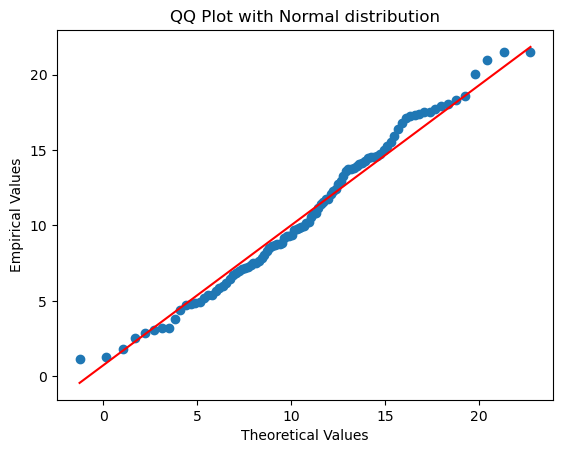

In [4]:
## Fitting the Normal Model
QQ_plots(data, dist='Normal')

AIC of the model with Exponential distribution is 657.91.


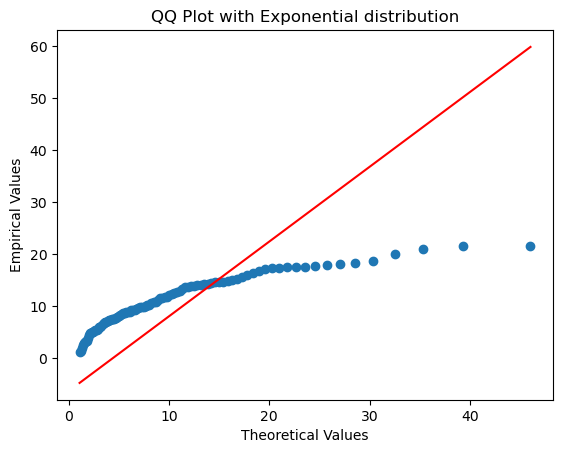

In [5]:
## Fitting the Exponential Model
QQ_plots(data, dist='Exponential')

In [6]:
data=np.array([ 37.65,  36.2 ,  86.5 ,  16.89, 110.03,  21.12,  47.52,  15.5 ,
         8.2 ,   7.24,  30.63,  38.79,   8.9 ,  52.69,  14.52,   9.8 ,
        10.23,  11.74, 107.32,  20.06,  17.02,  39.01,  50.66,   3.4 ,
        48.61,   2.51,   5.4 ,   1.22,   4.42,  13.86,  24.13,  57.39,
        13.2 ,   9.97,  31.89,  10.03,  17.07,  13.39,  11.76,  47.68,
        31.8 ,  21.97,  61.91,  22.13,  56.59,   8.75,  29.  ,  18.76,
        30.69,  11.55])

AIC of the model with Normal distribution is 466.3.


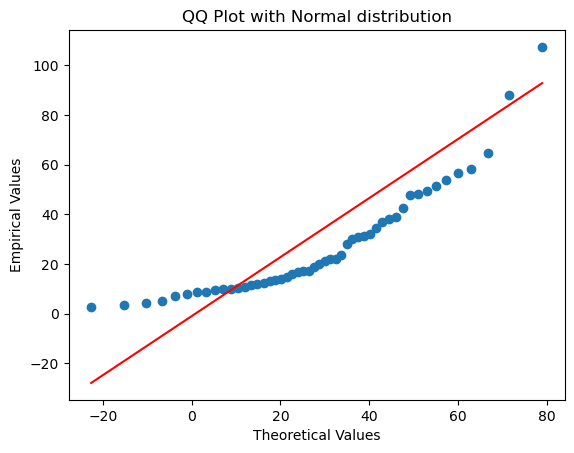

In [7]:
QQ_plots(data, dist='Normal')

AIC of the model with Exponential distribution is 431.31.


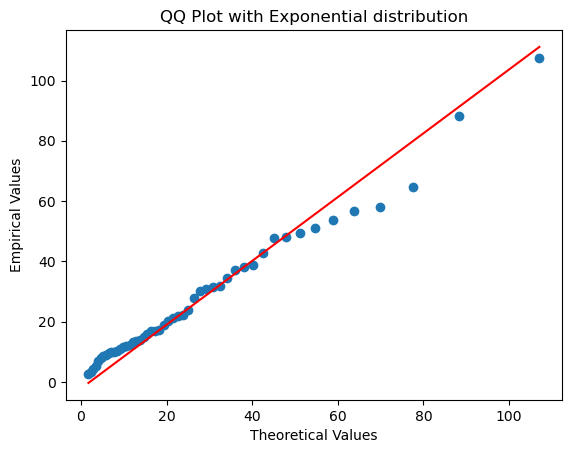

In [8]:
QQ_plots(data, dist='Exponential')